In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sns.set_theme(style="darkgrid")
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# get the color palette
palette = sns.color_palette()

In [3]:
sns.set_palette(palette)

In [4]:
# print Working Directory
print(os.getcwd())

/home/direct-lab/Documents/christopher/Multi_Agents_Area_Exploration/analysing_data/chris_plots


In [5]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data/all_data.csv")
# # data_save/all_data_map-len30.csv
# df_all = pd.read_csv(f"{root_directory}/data_save/all_data_map-len30.csv")


In [6]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

In [7]:
# check cwd if it plots
if 'analysing_data/plots' in os.getcwd():
    print("cwd is correct")

else:

    # moove to the plots folder
    #
    os.chdir("../../analysing_data/plots")
    print(os.getcwd())

cwd = os.getcwd()

/home/direct-lab/Documents/christopher/Multi_Agents_Area_Exploration/analysing_data/plots


In [8]:
df_all.shape

(25342111, 40)

In [9]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(25342111, 28)

In [10]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



In [11]:
df_all.describe()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Seed,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Experiment Id
count,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,25342111.0,25342111.0,25342111.0,25342111.0,2.534211e+07,25342111.0,2.534211e+07,2.534211e+07
mean,9.292248e+01,8.370077e-01,1.103849e-01,7.399697e+00,1.539867e+02,1.217252e+02,2.187371e-04,9.292248e+01,2.092519e+03,5.284630e+02,6.451129e+01,6.857582e+00,10.0,50.0,50.0,2500.0,1.070058e+01,20.0,1.778716e-01,9.479256e+04
std,8.945901e+01,2.093398e-01,1.546462e-01,6.289243e+00,1.017077e+02,1.076844e+02,1.462712e-03,8.945901e+01,5.233495e+02,4.323983e+02,8.622179e+00,3.183241e+00,0.0,0.0,0.0,0.0,6.548513e+00,0.0,7.523423e-02,5.789241e+04
min,0.000000e+00,6.440000e-02,0.000000e+00,1.000000e-02,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.610000e+02,2.000000e+00,5.000000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,4.000000e+00,20.0,9.680000e-02,0.000000e+00
25%,3.200000e+01,7.568000e-01,4.000000e-02,3.040000e+00,7.900000e+01,5.500000e+01,0.000000e+00,3.200000e+01,1.892000e+03,2.172376e+02,5.700000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,4.000000e+00,20.0,9.680000e-02,4.321400e+04
50%,7.000000e+01,9.316000e-01,6.000000e-02,6.060000e+00,1.250000e+02,9.600000e+01,0.000000e+00,7.000000e+01,2.329000e+03,4.234924e+02,6.500000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,1.200000e+01,20.0,1.336000e-01,8.762500e+04
75%,1.280000e+02,9.924000e-01,1.300000e-01,1.012000e+01,2.070000e+02,1.550000e+02,0.000000e+00,1.280000e+02,2.481000e+03,7.211270e+02,7.200000e+01,8.000000e+00,10.0,50.0,50.0,2500.0,2.000000e+01,20.0,2.624000e-01,1.445180e+05
max,2.499000e+03,1.000000e+00,4.960000e+00,2.631500e+02,1.282000e+03,4.838000e+03,1.000000e-02,2.499000e+03,2.500000e+03,6.943362e+03,7.900000e+01,1.200000e+01,10.0,50.0,50.0,2500.0,2.000000e+01,20.0,2.772000e-01,2.024990e+05


In [12]:
# conver columns to category that have less than 10 unique values
for col in df_all.columns:
    if df_all[col].nunique() < 20:
        df_all[col] = df_all[col].astype('category')

In [13]:
df_all.columns
# '''
# 'Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
#        'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
#        'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
#        'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
#        'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
#        'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
#        'Execution Date']
#        '''

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type'],
      dtype='object')

In [14]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))

# convert rows to category that have less than 10 unique values
for col in df_all.columns:
    if df_all[col].nunique() < 10:
        df_all[col] = df_all[col].astype('category')


wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Delta Time')
with open(f"worst_case.txt", 'w') as f:
    f.write(wost_case.to_latex())
wost_case

/tmp/ipykernel_237123/642024271.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Delta Time')
/tmp/ipykernel_237123/642024271.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


,Frame Count,Replan Count,Delta Time,Update Time
M,,,,
V.F.H.R.,894,443,39.50,3.15
U.R.,2499,471,51.06,3.57
V.F.H.C.,595,921,54.52,3.75
D.E.G.U.,2499,837,55.44,4.96
G.,912,1191,55.85,3.92
D.E.G.F.,780,1101,58.00,4.15
F.C.,678,1216,69.70,4.29
U.C.,555,1460,73.73,4.66
F.R.,1208,1005,85.20,3.82


In [15]:
# list all categories
df_all.select_dtypes('category').columns

Index(['Logging Time', 'Success', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Cols', 'Rows', 'Room Area',
       'Min Room Size', 'Max Room Size', 'Method', 'Start Scenario',
       'Goal Scenario', 'Loss Type', 'M'],
      dtype='object')

In [16]:
# # The average frame_count for each method
# df_all.groupby(['Method']).max()['Delta Time', 'Delta Time'].sort_values().apply(lambda x: ','+str(int(x))).to_frame()

In [17]:
df_all.groupby(['Experiment Id']).max()

/tmp/ipykernel_237123/168644692.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_all.groupby(['Experiment Id']).max()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Frame Count,Known Area,Total Distance Travelled,Seed,Wall Ratio
Experiment Id,,,,,,,,,,,
0,224,1.0,0.48,12.86,294,267,224,2500,1008.666089,50,0.2696
1,129,1.0,0.60,14.07,164,200,129,2500,584.031529,50,0.1308
2,116,1.0,0.99,14.24,195,240,116,2500,538.658946,50,0.0968
3,117,1.0,0.47,9.88,130,234,117,2500,553.327994,51,0.2652
4,83,1.0,0.69,10.76,118,168,83,2500,377.149278,51,0.1300
...,...,...,...,...,...,...,...,...,...,...,...
202495,60,1.0,0.67,9.25,430,229,60,2500,810.908730,78,0.1412
202496,16,1.0,0.97,7.20,377,142,16,2500,221.622366,78,0.0968
202497,82,1.0,0.51,7.48,342,312,82,2500,1148.756493,79,0.2684


In [18]:
df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])
# create an actanom column for the methods that takse the 1st letter of the method of each method
df_end['M'] = df_end['Method'].apply(lambda x: ''.join([str(i[0])+'.' for i in x.split(' ')]))
df_end['M'] 
df_end.head()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
18318338,224,1.0,0.48,12.86,0,267,0.00,224,2500,1008.666089,True,50,False,True,False,4,10,50,50,2500,4.0,20.0,0.2696,Unknown Closest,start-Rand_Start,goal-Rand_Start,0,Agent,U.C.
24992983,129,1.0,0.21,14.07,57,200,0.00,129,2500,584.031529,True,50,False,True,False,4,10,50,50,2500,12.0,20.0,0.1308,Unknown Closest,start-Rand_Start,goal-Rand_Start,1,Agent,U.C.
7855247,116,1.0,0.13,14.24,33,240,0.00,116,2500,538.658946,True,50,False,True,False,4,10,50,50,2500,20.0,20.0,0.0968,Unknown Closest,start-Rand_Start,goal-Rand_Start,2,Agent,U.C.
23175780,117,1.0,0.45,9.88,0,234,0.01,117,2500,553.327994,True,51,False,True,False,4,10,50,50,2500,4.0,20.0,0.2652,Unknown Closest,start-Rand_Start,goal-Rand_Start,3,Agent,U.C.
17936765,83,1.0,0.66,10.76,0,168,0.00,83,2500,377.149278,True,51,False,True,False,4,10,50,50,2500,12.0,20.0,0.1300,Unknown Closest,start-Rand_Start,goal-Rand_Start,4,Agent,U.C.


In [19]:
df_end[df_end['M']=='U.R.']

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
7432427,378,1.0,0.29,19.05,0,161,0.0,378,2500,1712.893578,True,50,False,True,False,4,10,50,50,2500,4.0,20.0,0.2696,Unknown Random,start-Rand_Start,goal-Rand_Start,40500,Agent,U.R.
14098536,182,1.0,0.34,15.28,57,131,0.0,182,2500,873.732106,True,50,False,True,False,4,10,50,50,2500,12.0,20.0,0.1308,Unknown Random,start-Rand_Start,goal-Rand_Start,40501,Agent,U.R.
22305073,152,1.0,0.92,13.15,0,92,0.0,152,2500,694.570635,True,50,False,True,False,4,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Rand_Start,goal-Rand_Start,40502,Agent,U.R.
12283743,208,1.0,0.14,10.22,123,123,0.0,208,2500,967.962554,True,51,False,True,False,4,10,50,50,2500,4.0,20.0,0.2652,Unknown Random,start-Rand_Start,goal-Rand_Start,40503,Agent,U.R.
7041046,149,1.0,0.74,12.24,0,97,0.0,149,2500,682.156421,True,51,False,True,False,4,10,50,50,2500,12.0,20.0,0.1300,Unknown Random,start-Rand_Start,goal-Rand_Start,40504,Agent,U.R.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107833,53,1.0,1.55,15.51,84,143,0.0,53,2500,751.293506,True,78,False,True,False,12,10,50,50,2500,12.0,20.0,0.1412,Unknown Random,start-Distributed_Start,goal-Distributed_Start,60745,Disrepair,U.R.
17479612,40,1.0,2.21,17.14,88,145,0.0,40,2500,551.428499,True,78,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Distributed_Start,goal-Distributed_Start,60746,Disrepair,U.R.
5240774,137,1.0,0.68,22.46,405,236,0.0,137,2500,1856.138310,True,79,False,True,False,12,10,50,50,2500,4.0,20.0,0.2684,Unknown Random,start-Distributed_Start,goal-Distributed_Start,60747,Disrepair,U.R.
8643393,40,1.0,1.09,13.40,180,137,0.0,40,2500,544.215295,True,79,False,True,False,12,10,50,50,2500,12.0,20.0,0.1136,Unknown Random,start-Distributed_Start,goal-Distributed_Start,60748,Disrepair,U.R.


In [20]:

print('Success Count: ', df_end['Success'].value_counts()[True])
print('Fail Count: ', df_end['Success'].value_counts()[False])


print("the Success rate is: ", df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum())
# drop any row Success == False
print(df_end[df_end['Success'] == False]['Loss Type'].value_counts())

# print(df_end[df_end['Success'] == False]['Method'].value_counts())


Success Count:  173982
Fail Count:  28518
the Success rate is:  0.8591703703703704
Unrecoverable    28493
Disrepair           25
Agent                0
Name: Loss Type, dtype: int64


In [21]:
# df_end['Success Ratio'] 
method_group = df_end.groupby(['M', 'Loss Type','Success',]).count()['Experiment Id'].unstack()
method_group['Success Ratio'] = method_group[True]/(method_group[True]+method_group[False])

method_group.reset_index(inplace=True)
method_group.drop(columns=[True, False], inplace=True)
# drop Success
# method_group.drop(columns=['Success'], inplace=True)
# stack up
method_group = method_group.set_index(['M',  'Loss Type']).stack().reset_index()
method_group.drop(columns=['Success'], inplace=True)
# rename the column 0 to Success Ratio
method_group.rename(columns={0:'Success Ratio'}, inplace=True)
method_group.set_index(['M',  'Loss Type'], inplace=True)

with open(f"loss_type.tex", 'w') as f:
    # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
    # rotate the table 90 degrees so the index is now the columns
    f.write(method_group.to_latex())

method_group


/tmp/ipykernel_237123/2346326559.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(method_group.to_latex())


Success Ratio
M        Loss Type                   
D.E.G.F. Agent               1.000000
         Disrepair           1.000000
         Unrecoverable       0.559407
D.E.G.U. Agent               1.000000
         Disrepair           0.999407
         Unrecoverable       0.654667
D.F.C.   Agent               1.000000
         Disrepair           0.998963
         Unrecoverable       0.679852
F.C.     Agent               1.000000
         Disrepair           0.999852
         Unrecoverable       0.608148
F.R.     Agent               1.000000
         Disrepair           0.999556
         Unrecoverable       0.322963
G.       Agent               1.000000
         Disrepair           0.999852
         Unrecoverable       0.499111
U.C.     Agent               1.000000
         Disrepair           0.999556
         Unrecoverable       0.710519
U.R.     Agent               1.000000
         Disrepair           0.999556
         Unrecoverable       0.425926
V.F.H.C. Agent               1.000000
         Disrepair           0.999556
         Unrecoverable       0.730519
V.F.H.R. Agent               1.000000
         Disrepair           1.000000
         Unrecoverable       0.587704

In [22]:
df_end_success = df_end[df_end['Success'] == True]

with open(f"methods.tex", 'w') as f:
    # f.write(df_end_success[['Method', "M"]].drop_duplicates().reset_index(drop=True).to_latex())
    # sort alphabetically
    f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())

/tmp/ipykernel_237123/1376767921.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())


In [23]:
df_end.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type', 'M'],
      dtype='object')

In [24]:
df_end.head()

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
18318338,224,1.0,0.48,12.86,0,267,0.00,224,2500,1008.666089,True,50,False,True,False,4,10,50,50,2500,4.0,20.0,0.2696,Unknown Closest,start-Rand_Start,goal-Rand_Start,0,Agent,U.C.
24992983,129,1.0,0.21,14.07,57,200,0.00,129,2500,584.031529,True,50,False,True,False,4,10,50,50,2500,12.0,20.0,0.1308,Unknown Closest,start-Rand_Start,goal-Rand_Start,1,Agent,U.C.
7855247,116,1.0,0.13,14.24,33,240,0.00,116,2500,538.658946,True,50,False,True,False,4,10,50,50,2500,20.0,20.0,0.0968,Unknown Closest,start-Rand_Start,goal-Rand_Start,2,Agent,U.C.
23175780,117,1.0,0.45,9.88,0,234,0.01,117,2500,553.327994,True,51,False,True,False,4,10,50,50,2500,4.0,20.0,0.2652,Unknown Closest,start-Rand_Start,goal-Rand_Start,3,Agent,U.C.
17936765,83,1.0,0.66,10.76,0,168,0.00,83,2500,377.149278,True,51,False,True,False,4,10,50,50,2500,12.0,20.0,0.1300,Unknown Closest,start-Rand_Start,goal-Rand_Start,4,Agent,U.C.


In [25]:
# df_end_success['Area Percent']/df_end_success['Total Distance Travelled']
method_group_Quality = df_end.groupby(['M']).mean()
method_group_Quality['Quality'] = method_group_Quality['Area Percent'] / method_group_Quality['Total Distance Travelled']
# show quality and method
method_group_Quality = method_group_Quality.reset_index()[['M','Quality']]
# method_group[['M','Quality']]
method_group_Quality = method_group_Quality.sort_values(by='Quality')
method_group_Quality.reset_index()

,index,M,Quality
0,4,F.R.,0.000746
1,7,U.R.,0.000989
2,5,G.,0.001069
3,0,D.E.G.F.,0.001147
4,3,F.C.,0.001212
5,9,V.F.H.R.,0.001428
6,1,D.E.G.U.,0.001471
7,2,D.F.C.,0.001549
8,6,U.C.,0.001609
9,8,V.F.H.C.,0.001749


In [26]:
method_group.head()

Success Ratio
M        Loss Type                   
D.E.G.F. Agent               1.000000
         Disrepair           1.000000
         Unrecoverable       0.559407
D.E.G.U. Agent               1.000000
         Disrepair           0.999407

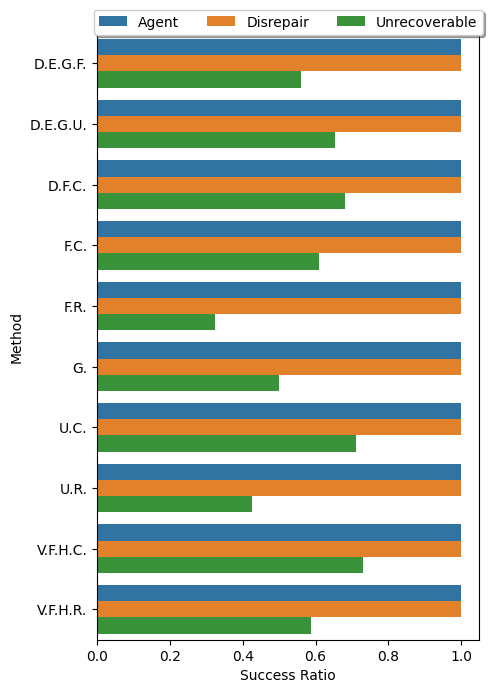

In [27]:
# method_group
sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())
# change the fig ratio
plt.gcf().set_size_inches(5, 7.)

# rename Y axis
plt.ylabel('Method')
# move the legend to the top center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
# 

# save the whole figure dont cut the legend
plt.tight_layout()


plt.savefig(f"Success_Ratio.png", dpi=300)

In [28]:
# g = sns.catplot(x="Experiment Id", y="count", hue="Success", kind="bar", col="Loss Type", data=df_end.groupby(['Method','Success', 'Loss Type']).count()['Experiment Id'].reset_index())

# # Set labels for axes and title
# g.set_axis_labels("Experiment Id", "Count")
# g.set_titles("{col_name} Loss Type")

In [29]:
# save only the success
df_end_success = df_end[df_end['Success'] == True]

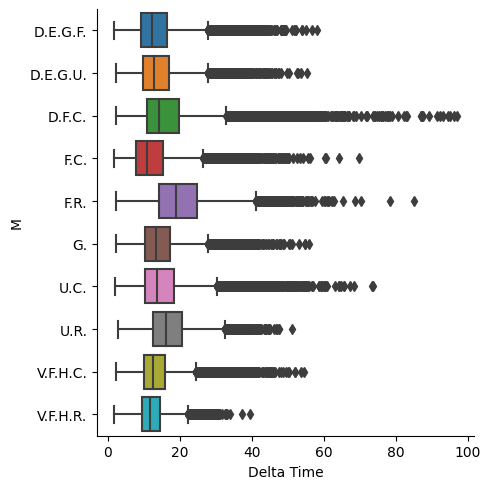

In [30]:
sns.catplot(y="M", x="Delta Time", kind="box", data=df_end_success)
plt.savefig(f"boxplot_frame_count.png")

<AxesSubplot:xlabel='Delta Time', ylabel='M'>

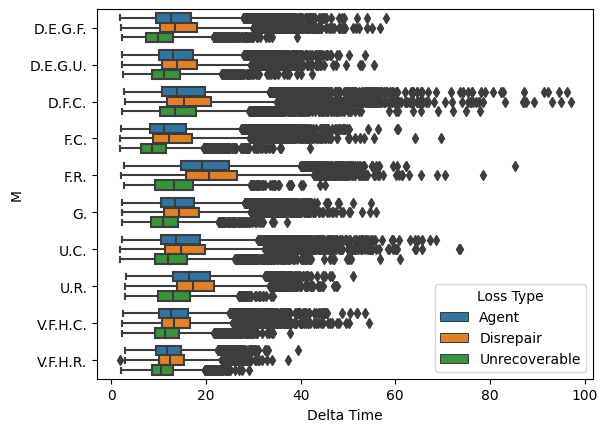

In [31]:
sns.boxplot(y="M", x="Delta Time",hue="Loss Type", data=df_end_success)


(0.0, 50.0)

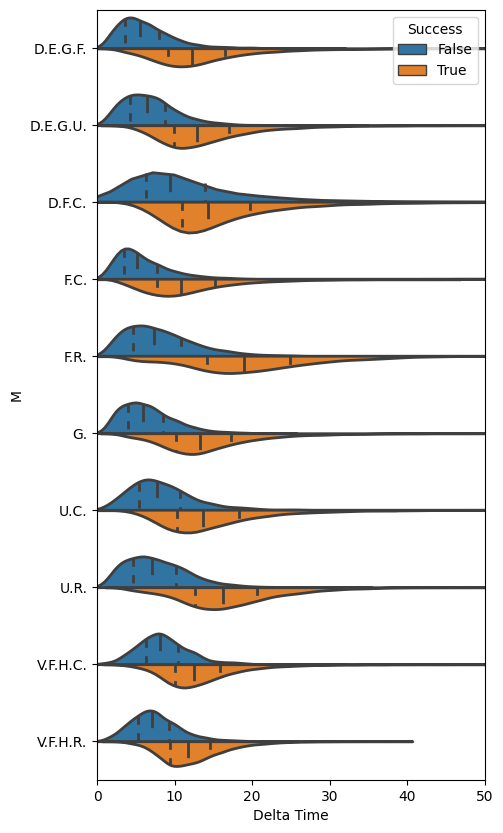

In [32]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.violinplot(y="M", x="Delta Time",hue="Success",
                data=df_end ,
                linewidth=2, split=True, inner="quartile",)
ax.set_xlim(0, 50)


<AxesSubplot:xlabel='Delta Time', ylabel='M'>

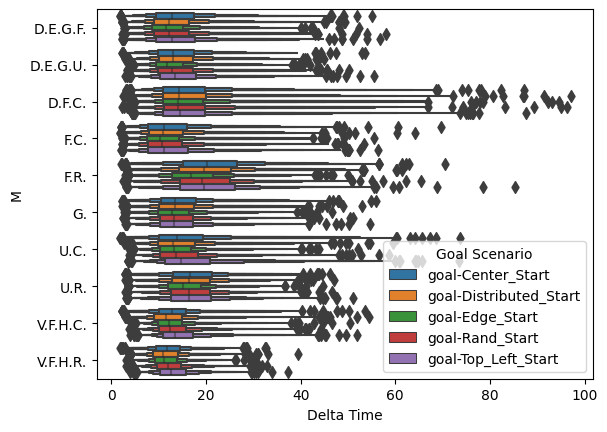

In [33]:
sns.boxenplot( y="M",x="Delta Time",hue="Goal Scenario",
                data=df_end_success ,
                )

<AxesSubplot:xlabel='Delta Time', ylabel='M'>

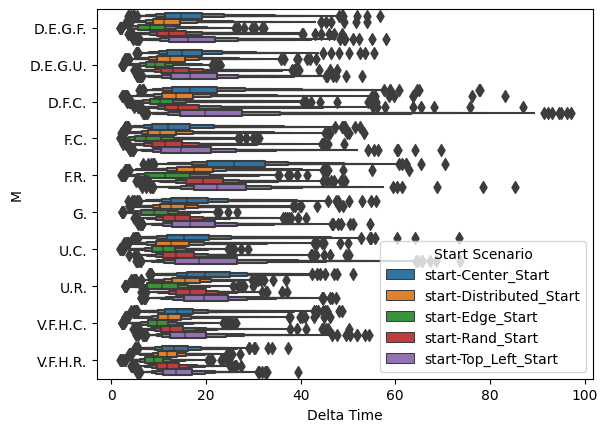

In [34]:
# "Goal Scenario" histogramq
# sns.histplot(data=df_end_success,x="Delta Time", hue="Goal Scenario", kde=True)
sns.boxenplot( y="M",x="Delta Time",hue="Start Scenario",
                data=df_end_success ,
                )


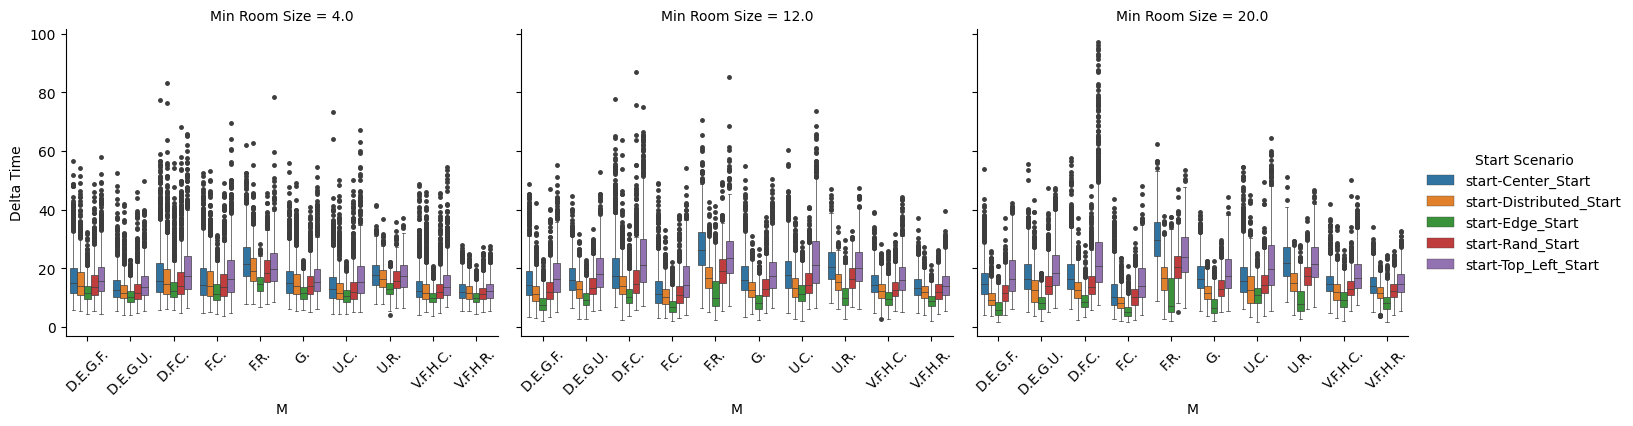

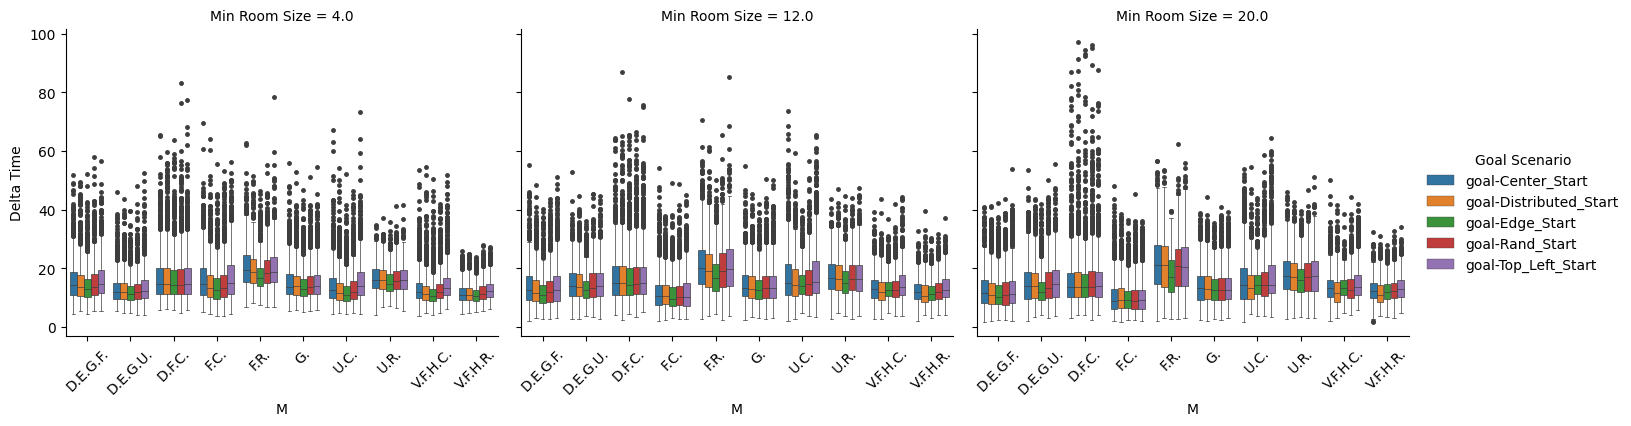

In [35]:
grd = sns.catplot(
    data=df_end_success, 
    y="Delta Time", x="M", hue="Start Scenario", 
    # col_wrap=3,
    col="Min Room Size",
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)
# set x range 
# grd.set(ylim=(0, 50))
# set Y label
grd.set_ylabels("Delta Time")
grd.set_xticklabels(rotation=45)

grd = sns.catplot(
    data=df_end_success, 
    y="Delta Time", x="M", hue="Goal Scenario", 
    # col_wrap=3,
    col="Min Room Size",
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)
# set x range 
# grd.set(ylim=(0, 50))
# set Y label
grd.set_ylabels("Delta Time")

grd.set_xticklabels(rotation=45)

# mkae the fige bigger
# grd.fig.set_size_inches(15, 6)
plt.savefig(f"boxplot_frame_count.png", dpi=300)

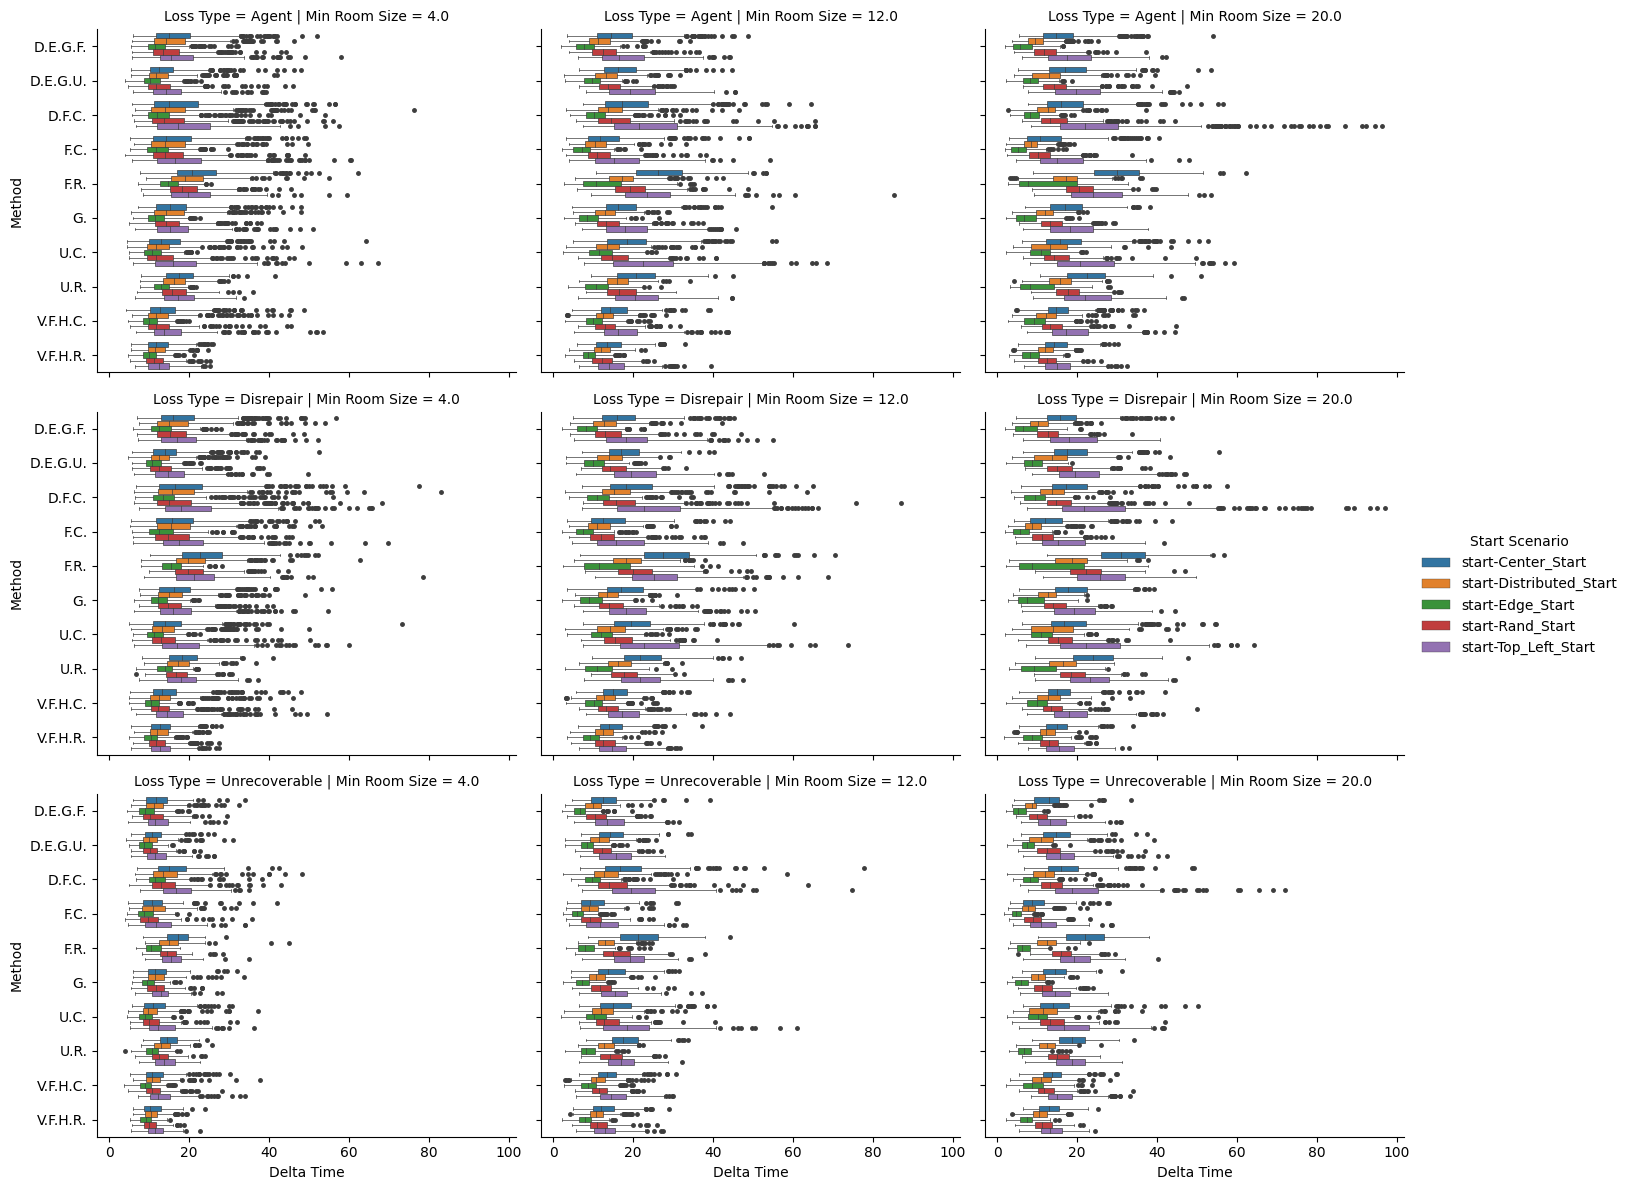

In [36]:
grd = sns.catplot(
    data=df_end_success, 
    x="Delta Time", y="M", hue="Start Scenario",
    col="Min Room Size", 
    # col_wrap=3,
    row="Loss Type",
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)
# set x range 
# grd.set(xlim=(0, 50))
# set Y label
grd.set_ylabels("Method")



# mkae the fige bigger
# grd.fig.set_size_inches(15, 6)
plt.savefig(f"boxplot_frame_count.png", dpi=300)


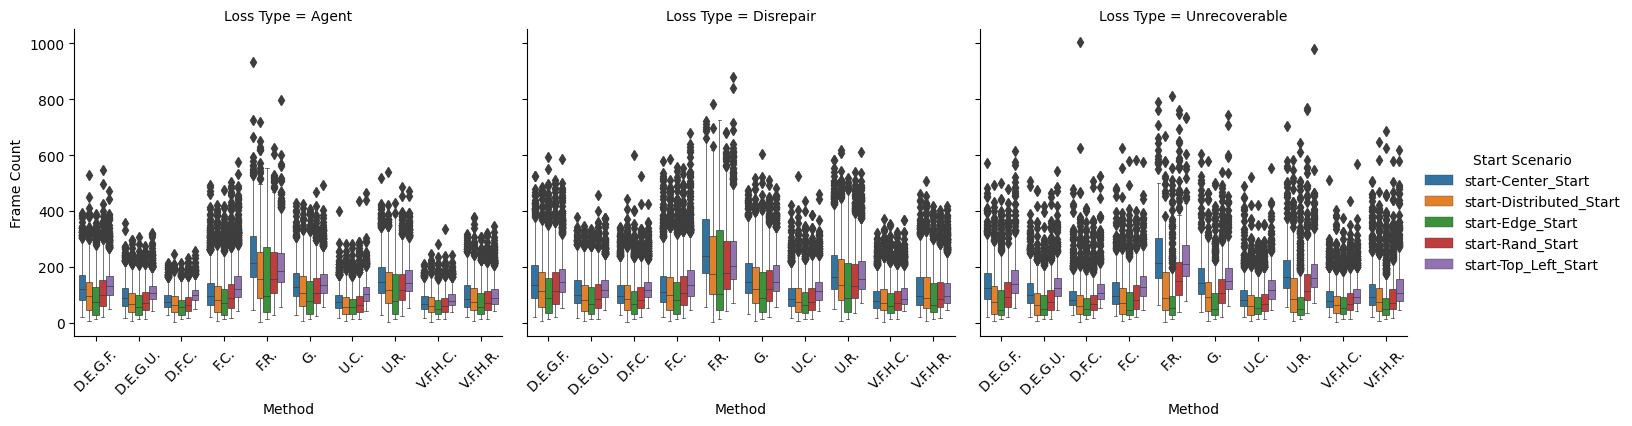

In [37]:
grd = sns.catplot(
    data=df_end_success, 
    y="Frame Count", 
    x="M", 
    hue="Start Scenario",
    col="Loss Type", 
    col_wrap=3,
    kind="box", 
    # kind="violin",
    # kind="bar",

    # bw=.25, cut=0, 
    # flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)

# set x range 
# grd.set(ylim=(0, 50))
# set Y label
grd.set_xlabels("Method")

# set the x frequency
# x_range = range(0,400, 50)
# plt.yticks(x_range, x_range,)
# # rotate the x labels
# plt.xticks(rotation=90)
grd.set_xticklabels(rotation=45)

In [38]:
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns

# def catplot_3d(z, x, y, data, palette=sns.color_palette(), alpha=1.0):
#     unique_x = np.unique(data[x].astype(str))
#     unique_y = np.unique(data[y].astype(str))
    
#     # create a new color for each unique_x
#     palette = sns.color_palette(n_colors=len(unique_x))
    
#     # Create a grid of positions for the bars
#     xpos, ypos = np.meshgrid(np.arange(len(unique_x)), np.arange(len(unique_y)), indexing='ij')
#     xpos = xpos.ravel()
#     ypos = ypos.ravel()
#     zpos = np.zeros_like(xpos)
    
#     # Calculate the heights of the bars
#     dz = data.pivot_table(index=y, columns=x, values=z, aggfunc='sum').values.ravel()
    
#     fig = plt.figure(figsize=(10, 8))
#     ax = fig.add_subplot(111, projection='3d')
    
#     # Plot the bars
#     for i, (xi, yi, zi) in enumerate(zip(xpos, ypos, dz)):
#         x_index = np.where(unique_x == data[x].unique()[xi])[0][0]
#         ax.bar3d(xi, yi, zpos[i], 0.5, 0.15, zi, alpha=alpha, color=palette[x_index])
    
#     # Set the labels for the axes
#     ax.set_xlabel(x)
#     ax.set_ylabel(y)
#     ax.set_zlabel(z)
    
#     # Set the ticks for the x and y axes
#     ax.set_xticks(np.arange(len(unique_x)), rotation=90)
#     ax.set_xticklabels(unique_x)
    
#     ax.set_yticks(np.arange(len(unique_y)))
#     ax.set_yticklabels(unique_y)
    
#     # Adjust the view angle
#     ax.view_init(elev=20, azim=-25)
    
#     # Show the plot
#     plt.show()


In [136]:

def catplot_3d(z, x, y, data, palette=sns.color_palette(), alpha_value=0.95):
    unique_x = np.unique(data[x].astype(str))
    unique_y = np.unique(data[y].astype(str))
    
    # Repeat colors cyclically if the number of unique x-axis values exceeds the palette length
    colormap = sns.color_palette(palette, n_colors=len(unique_x))
    
    # Create a grid of positions for the bars
    xpos, ypos = np.meshgrid(np.arange(len(unique_x)), np.arange(len(unique_y)), indexing='ij')
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = np.zeros_like(xpos)
    
    # Calculate the mean and standard deviation of the z-values
    mean_z = data.pivot_table(index=y, columns=x, values=z, aggfunc='mean').values.ravel()
    std_z = data.pivot_table(index=y, columns=x, values=z, aggfunc='std').values.ravel()
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the bars
    for i, (xi, yi, zi) in enumerate(zip(xpos, ypos, mean_z)):
        xi = np.where(unique_x == data[x].unique()[xi])[0][0]
        cur_color = np.array(colormap[xi])
        ax.bar3d(xi, yi, zpos[i], 1.0, 0.25, zi, alpha=1, color=cur_color,)
        
        # Draw a point at +1 standard deviation from the mean
        # ax.scatter(xi, yi, zi + std_z[i], color=cur_color, marker='o', s=10)
        # Draw a point at -1 standard deviation from the mean
        # ax.scatter(xi, yi, zi - std_z[i], color=cur_color, marker='o', s=10)
        # draw a connecting line between the points at +1 and -1 standard deviation
        # ax.plot([xi, xi], [yi, yi], [zi + std_z[i], zi - std_z[i]], color=cur_color, linewidth=10, alpha=0.5)
        # ax.errorbar(xi, yi, zi, zerr=std_z[i], color=cur_color, linewidth=10, alpha=0.95)

        # draw a 3d Box as the error bar
        # ax.bar3d(xi, yi, zi -std_z[i], 1.0, 0.15, 2*std_z[i], alpha=alpha_value, color=cur_color)
        

    # Set the labels for the axes
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    
    # Set the ticks for the x and y axes
    ax.set_xticks(np.arange(len(unique_x)))
    ax.set_xticklabels(unique_x)
    
    ax.set_yticks(np.arange(len(unique_y)))
    ax.set_yticklabels(unique_y)
    
    # Adjust the view angle
    ax.view_init(elev=20, azim=20)
    
    # Show the plot
    plt.show()


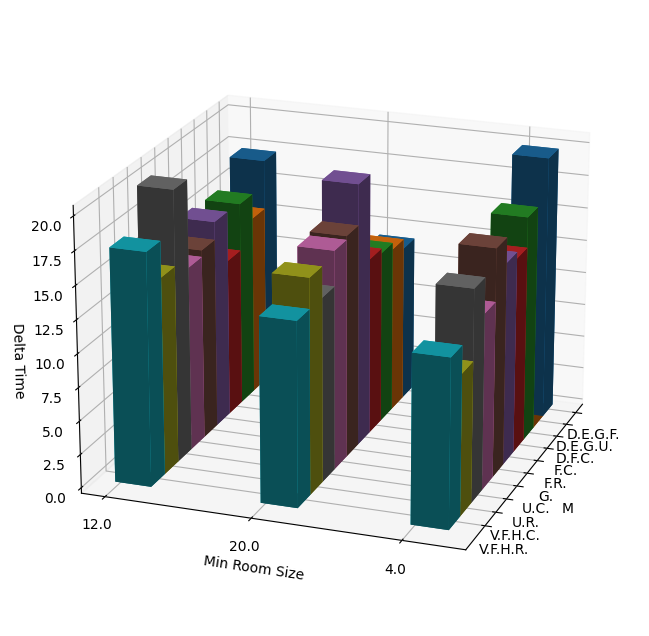

(None,)

In [137]:

catplot_3d(z="Delta Time", 
           x="M",
           y="Min Room Size", 
           data=df_end_success.sort_values(by="Delta Time", ascending=False),
           alpha_value=0.25,
            ),


In [ ]:
palette

In [ ]:
sns.scatterplot(x="Frame Count",y='Replan Count', hue="M", data=df_end, alpha=.5,)
# sns.kdeplot(x="Frame Count",y='Replan Count', hue="M", 
#              data=df_end,
#              fill=True,
#              levels=10,
#              alpha=.5,
#              )

# plt.xlim(0, 400)
plt.ylim(0, 1500)
plt.savefig(f"Replan_Count_vs_Frame_Count.png", dpi=300)

# get the color palette
palette = sns.color_palette()